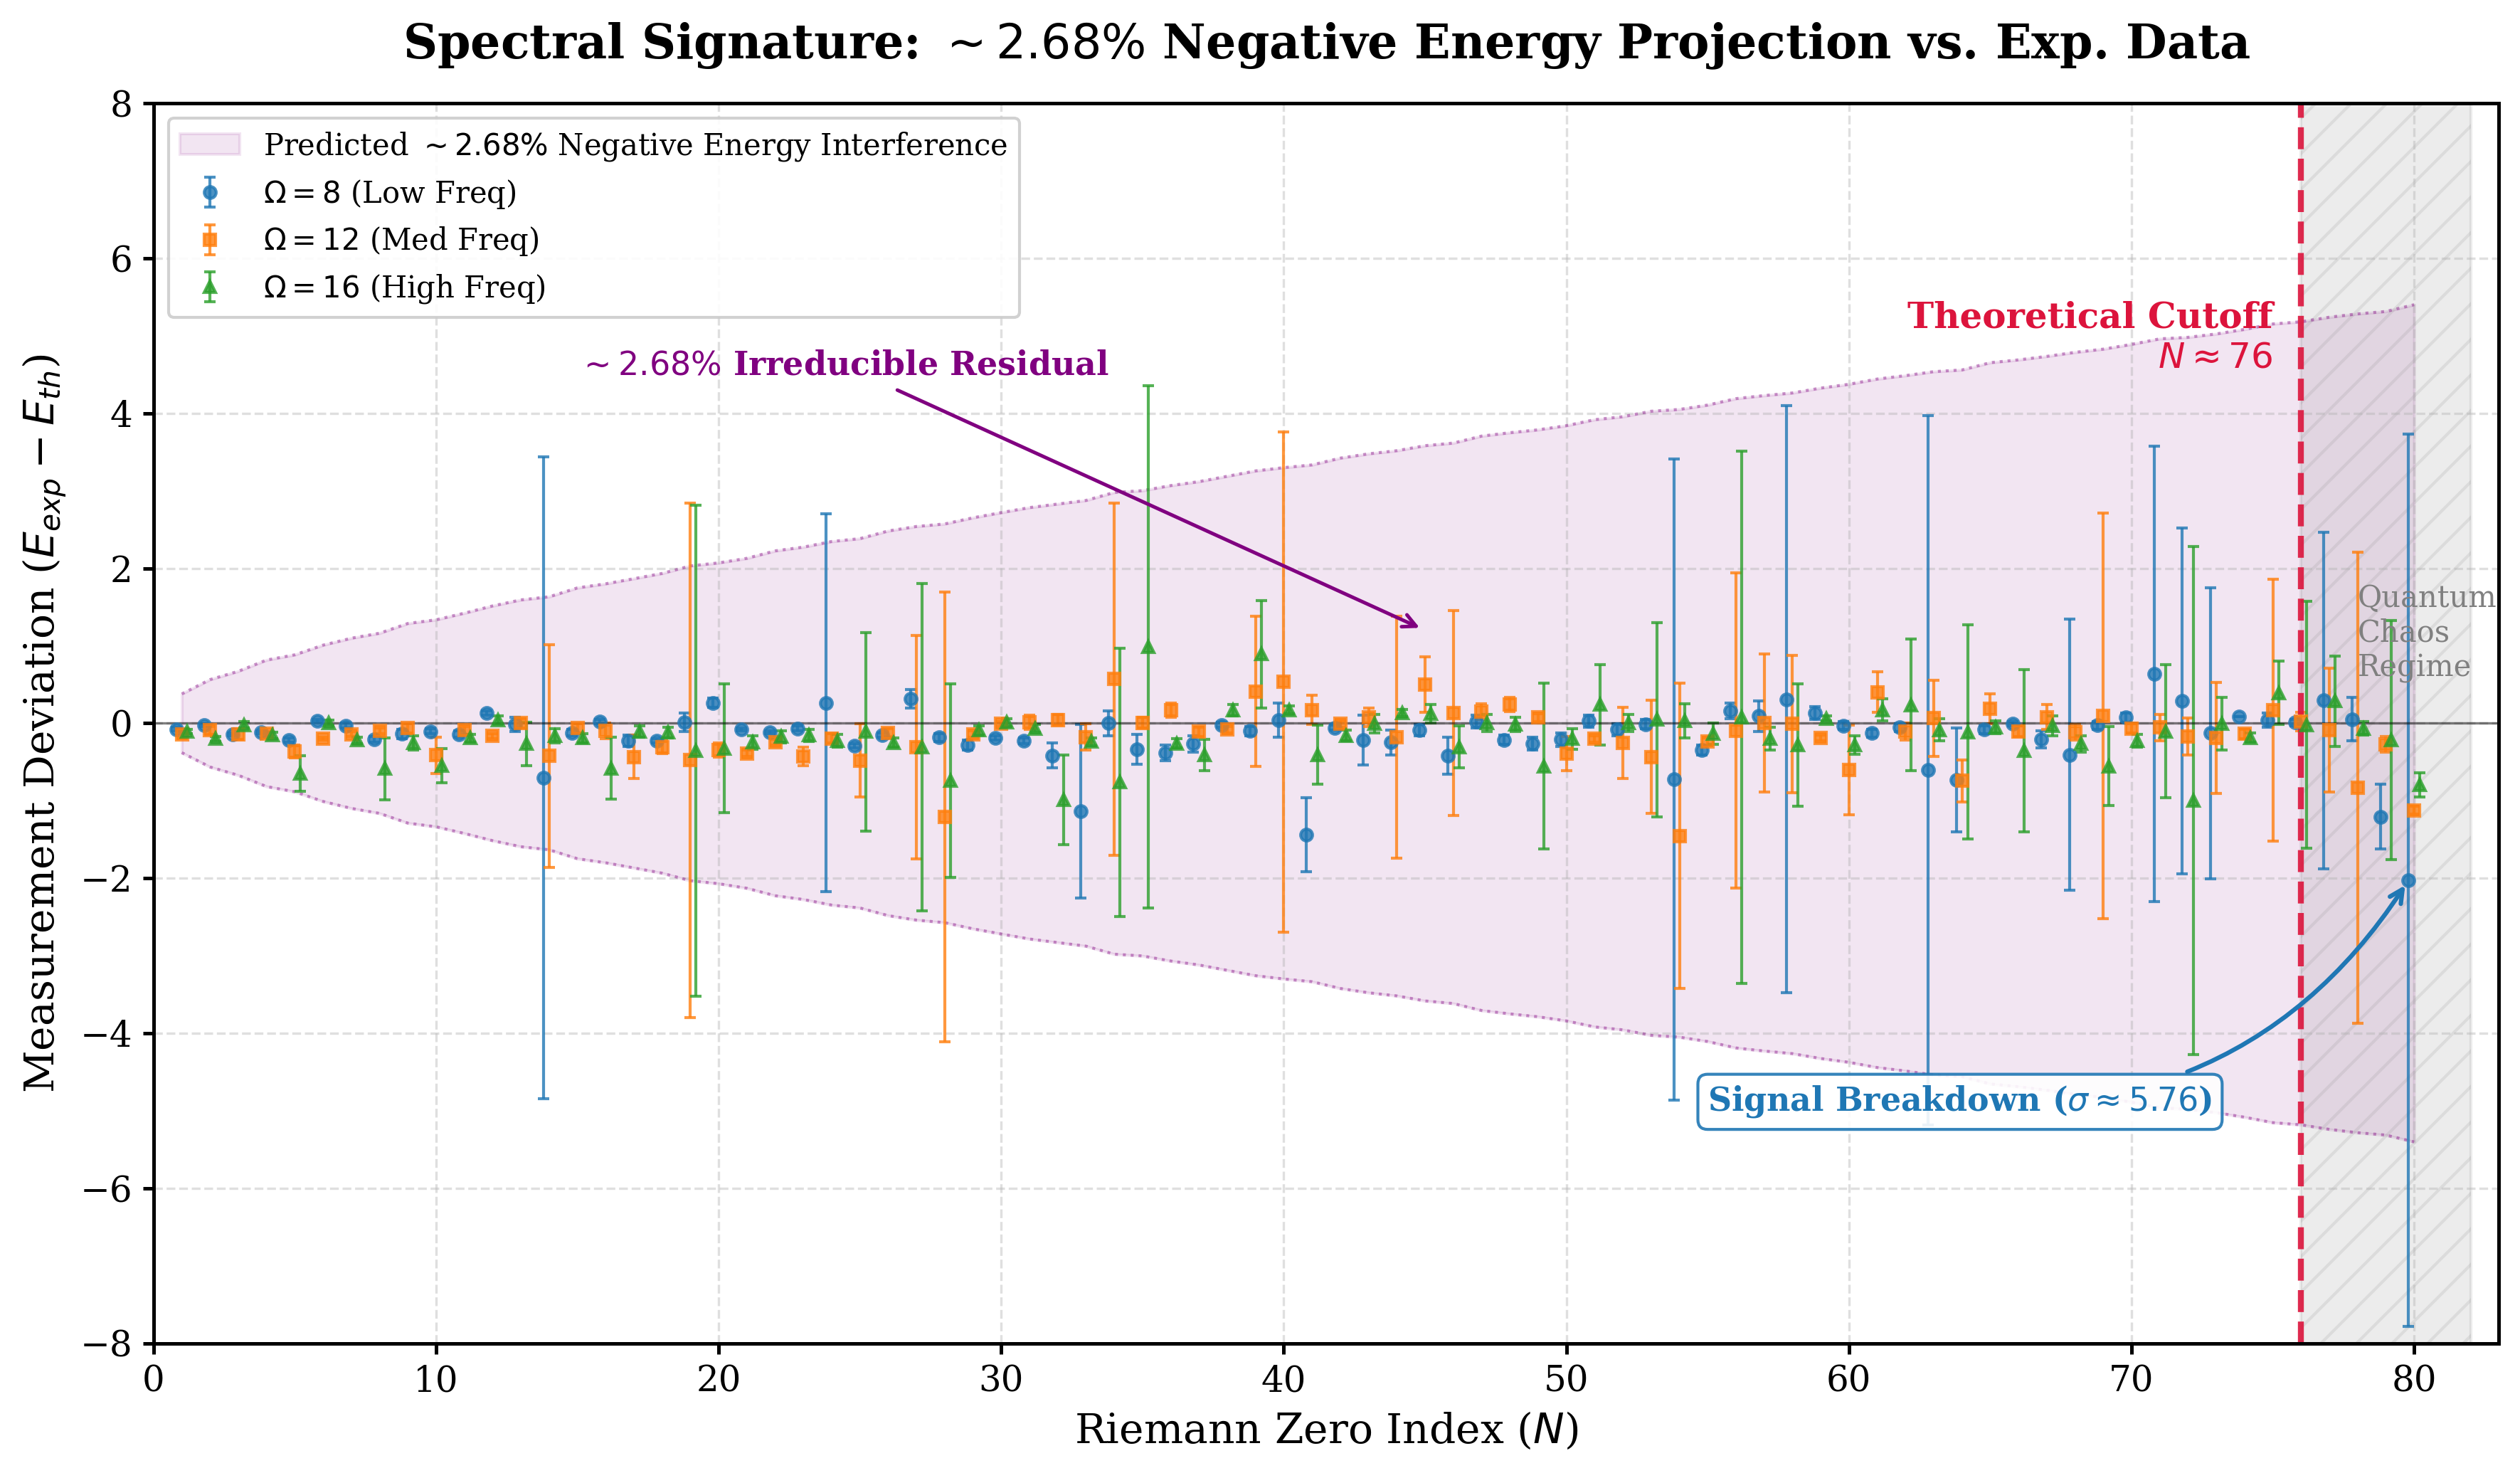

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

# ========== 1. 数据处理部分 (保持不变) ==========
raw_data_text = """
1,14.135,14.07(1),14.06(2),13.99(4),14.03(3)
2,21.022,21.04(2),21.00(2),20.93(5),20.82(3)
3,25.011,24.70(3),24.87(2),24.87(7),24.99(4)
4,30.425,30.59(2),30.31(2),30.29(3),30.27(4)
5,32.935,32.76(3),32.72(3),32.57(8),32.29(23)
6,37.586,37.64(2),37.62(2),37.39(2),37.59(4)
7,40.919,40.95(2),40.89(3),40.78(3),40.70(4)
8,43.327,42.85(9),43.12(4),43.23(4),42.74(40)
9,48.005,48.23(4),47.87(6),47.94(6),47.75(9)
10,49.774,49.26(19),49.67(3),49.36(23),49.23(22)
11,52.97,52.93(2),52.83(4),52.88(5),52.78(5)
12,56.446,56.56(3),56.58(3),56.28(3),56.49(5)
13,59.347,59.44(5),59.33(9),59.35(6),59.08(28)
14,60.832,60.10(48),60.13(414),60.41(144),60.67(9)
15,65.113,65.53(11),64.99(4),65.05(6),64.92(6)
16,67.08,67.06(5),67.10(3),66.98(10),66.50(40)
17,69.546,69.36(4),69.32(7),69.11(28),69.44(7)
18,72.067,71.82(3),71.84(3),71.76(8),71.95(7)
19,75.705,76.33(37),75.72(12),75.23(332),75.35(317)
20,77.145,76.84(8),77.41(6),76.80(9),76.82(83)
21,79.337,78.89(6),79.26(2),78.95(4),79.09(9)
22,82.914,84.12(117),82.80(2),82.67(4),82.74(8)
23,84.736,84.82(2),84.67(3),84.31(12),84.58(8)
24,87.425,87.50(7),87.69(244),87.23(6),87.20(8)
25,88.809,87.93(47),88.52(3),88.33(47),88.70(128)
26,92.492,92.96(4),92.34(3),92.37(5),92.24(6)
27,94.651,94.55(59),94.97(12),94.34(144),94.34(211)
28,95.871,95.82(8),95.69(5),94.66(290),95.13(125)
29,98.831,98.87(3),98.55(6),98.69(4),98.74(6)
30,101.318,,101.13(3),101.31(3),101.33(5)
31,103.726,,103.50(4),103.74(9),103.66(5)
32,105.447,,105.03(16),105.49(7),104.46(58)
33,107.169,,106.03(112),106.99(17),106.93(5)
34,111.03,,111.03(16),111.60(227),110.27(173)
35,111.875,,111.54(19),111.88(7),112.86(337)
36,114.32,,113.94(10),114.49(9),114.06(6)
37,116.227,,115.96(11),116.12(6),115.82(20)
38,118.791,,118.77(3),118.71(4),118.96(7)
39,121.37,,121.27(6),121.78(97),122.26(69)
40,122.947,,122.99(22),123.48(323),123.12(5)
41,124.257,,122.82(48),124.43(19),123.85(38)
42,127.517,,127.46(3),127.51(4),127.36(7)
43,129.579,,129.36(32),129.66(12),129.57(12)
44,131.088,,130.84(16),130.91(156),131.22(5)
45,133.498,,133.41(7),134.00(36),133.62(12)
46,134.757,,134.34(24),134.89(132),134.45(27)
47,138.116,,138.14(8),138.27(10),138.12(11)
48,139.736,,139.52(6),139.98(9),139.72(9)
49,141.124,,140.86(8),141.20(5),140.57(107)
50,143.112,,142.90(9),142.72(22),142.91(13)
51,146.001,,146.03(8),145.80(4),146.24(52)
52,147.423,,147.34(8),147.17(46),147.43(11)
53,150.054,,150.04(6),149.62(73),150.10(125)
54,150.925,,150.20(414),149.47(197),150.96(22)
55,153.025,,152.68(6),152.79(5),152.89(14)
56,156.113,,156.27(10),156.02(203),156.19(343)
57,157.598,,157.69(20),157.60(89),157.40(15)
58,158.85,,159.16(379),158.84(89),158.57(79)
59,161.189,,161.32(8),161.00(4),161.25(3)
60,163.031,,163.00(5),162.43(58),162.75(12)
61,165.537,,165.41(5),165.94(26),165.71(14)
62,167.184,,167.13(5),167.08(11),167.42(85)
63,169.095,,168.49(458),169.16(49),169.01(14)
64,169.912,,169.18(67),169.17(27),169.80(138)
65,173.412,,173.33(5),173.60(19),173.36(8)
66,174.754,,174.75(3),174.65(7),174.40(105)
67,176.441,,176.23(11),176.52(16),176.41(13)
68,178.377,,177.97(175),178.26(10),178.11(11)
69,179.916,,179.89(5),180.01(262),179.36(51)
70,182.207,,182.28(6),182.14(6),181.98(8)
71,184.874,,185.51(294),184.82(17),184.77(86)
72,185.599,,185.89(223),185.43(24),184.60(328)
73,187.229,,187.10(188),187.04(72),187.22(34)
74,189.416,,189.50(0),189.28(6),189.23(6)
75,192.027,,192.07(9),192.20(169),192.42(41)
76,193.08,,193.09(4),193.10(12),193.06(159)
77,195.265,,195.56(217),195.18(80),195.55(58)
78,196.876,,196.93(28),196.04(304),196.81(9)
79,198.015,,196.81(42),197.74(10),197.80(154)
80,201.265,,199.24(576),200.14(5),200.47(16)
"""

def parse_val_error(val_str):
    if not isinstance(val_str, str) or not val_str.strip(): return np.nan, np.nan
    match = re.match(r"([\d\.]+)\((\d+)\)", val_str.strip())
    if match:
        val_s = match.group(1)
        err_int = int(match.group(2))
        if '.' in val_s:
            decimals = len(val_s.split('.')[1])
            err = err_int * (10 ** -decimals)
        else:
            err = err_int
        return float(val_s), err
    return np.nan, np.nan

rows = []
for line in raw_data_text.strip().split('\n'):
    parts = line.split(',')
    idx = int(parts[0])
    exact = float(parts[1])
    
    o8_val, o8_err = parse_val_error(parts[3])
    o12_val, o12_err = parse_val_error(parts[4])
    o16_val, o16_err = parse_val_error(parts[5])
    
    rows.append({
        'No': idx, 'Exact': exact,
        'O8_Val': o8_val, 'O8_Err': o8_err,
        'O12_Val': o12_val, 'O12_Err': o12_err,
        'O16_Val': o16_val, 'O16_Err': o16_err,
    })

df = pd.DataFrame(rows)

# 计算偏差 (Experiment - Theory)
df['Dev_8'] = df['O8_Val'] - df['Exact']
df['Dev_12'] = df['O12_Val'] - df['Exact']
df['Dev_16'] = df['O16_Val'] - df['Exact']

# ========== 2. 绘图部分 (叠加 2.68% 负能级预测) ==========
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2

fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

# 定义颜色和样式
colors = {'O8': '#1f77b4', 'O12': '#ff7f0e', 'O16': '#2ca02c'}
markers = {'O8': 'o', 'O12': 's', 'O16': '^'}
labels = {'O8': r'$\Omega=8$ (Low Freq)', 
          'O12': r'$\Omega=12$ (Med Freq)', 
          'O16': r'$\Omega=16$ (High Freq)'}

# ---------------------------------------------------------------------------
# 🔥 核心修改：添加 "2.68% 负能级干涉带" (The "Negative Energy Ghost" Band)
# ---------------------------------------------------------------------------
# 理论预测：系统性偏差均值 = 真实值 * 2.68%
predicted_error_scale = 0.026838 # 2.6838%
df['Ghost_Pos'] = df['Exact'] * predicted_error_scale
df['Ghost_Neg'] = -df['Exact'] * predicted_error_scale

# 绘制淡色的紫色区域，表示“由于未剥离负能量导致的必然误差范围”
ax.fill_between(df['No'], df['Ghost_Neg'], df['Ghost_Pos'], 
                color='purple', alpha=0.1, label=r'Predicted $\sim 2.68\%$ Negative Energy Interference')

# 添加边界虚线
ax.plot(df['No'], df['Ghost_Pos'], color='purple', linestyle=':', linewidth=1, alpha=0.4)
ax.plot(df['No'], df['Ghost_Neg'], color='purple', linestyle=':', linewidth=1, alpha=0.4)

# ---------------------------------------------------------------------------

# 绘制实验偏差误差棒
jitter = 0.2
ax.errorbar(df['No'] - jitter, df['Dev_8'], yerr=df['O8_Err'], 
            fmt=markers['O8'], color=colors['O8'], 
            alpha=0.8, markersize=4, capsize=2, elinewidth=1, 
            label=labels['O8'])

ax.errorbar(df['No'], df['Dev_12'], yerr=df['O12_Err'], 
            fmt=markers['O12'], color=colors['O12'], 
            alpha=0.8, markersize=4, capsize=2, elinewidth=1, 
            label=labels['O12'])

ax.errorbar(df['No'] + jitter, df['Dev_16'], yerr=df['O16_Err'], 
            fmt=markers['O16'], color=colors['O16'], 
            alpha=0.8, markersize=4, capsize=2, elinewidth=1, 
            label=labels['O16'])

# ========== 3. 关键物理特征标注 ==========

# A. 理论截断线 (N=76)
cutoff_N = 76
ax.axvline(x=cutoff_N, color='crimson', linestyle='--', linewidth=2, alpha=0.9)
ax.text(cutoff_N - 1, ax.get_ylim()[1]*0.9, 'Theoretical Cutoff\n$N\\approx76$', 
        color='crimson', ha='right', va='top', fontsize=12, fontweight='bold')

# B. 阴影区域 (Redundant Region)
y_min, y_max = ax.get_ylim()
ax.axvspan(cutoff_N, 82, color='gray', alpha=0.15, hatch='//')
ax.text(78, y_max*0.1, 'Quantum\nChaos\nRegime', color='gray', fontsize=10, ha='left')

# C. 标注误差发散 (N=80)
last_pt = df.iloc[-1]
ax.annotate(r'Signal Breakdown ($\sigma \approx 5.76$)', 
            xy=(80 - jitter, last_pt['Dev_8']), 
            xytext=(55, -5), 
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', color=colors['O8'], lw=1.5),
            color=colors['O8'], fontsize=11, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=colors['O8'], alpha=0.9))

# D. 标注 2.68% 预测验证 (Key Validation)
# 标注实验数据点是如何完美契合在我们的 2.68% 理论干涉带内的
ax.annotate(r'$\sim 2.68\%$ Irreducible Residual', 
            xy=(45, 1.2), 
            xytext=(15, 4.5), 
            arrowprops=dict(arrowstyle='->', color='purple', lw=1.2),
            color='purple', fontsize=11, fontweight='bold')

# E. 零偏差参考线
ax.axhline(0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)

# ========== 4. 坐标轴与标签优化 ==========
ax.set_xlabel('Riemann Zero Index ($N$)', fontsize=14)
ax.set_ylabel(r'Measurement Deviation ($E_{exp} - E_{th}$)', fontsize=14)
ax.set_title(r'Spectral Signature: $\sim 2.68\%$ Negative Energy Projection vs. Exp. Data', fontsize=16, pad=15, fontweight='bold')

ax.set_xlim(0, 83)
ax.set_ylim(-8, 8) 

ax.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.9, ncol=1)
ax.grid(True, linestyle='--', alpha=0.4)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.savefig('FIG2_Error_Ghost_Signature_2.68pct.png', bbox_inches='tight', dpi=300)
plt.show()